In [4]:
!pip install --upgrade wandb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 76.8 MB/s eta 0:00:00
  Attempting uninstall: wandb
    Found existing installation: wandb 0.19.6
    Uninstalling wandb-0.19.6:
      Successfully uninstalled wandb-0.19.6


# Step 1: Installing and Importing Required Libraries

## Installing and setting up dependencies
- Install and upgrade Weights & Biases (wandb) for experiment tracking and visualization
- Set up Python environment with required packages

## Importing essential libraries
**Machine Learning & Data Processing:**
- NumPy and Pandas for data manipulation
- TensorFlow and Keras for deep learning
- Scikit-learn for model evaluation and preprocessing

**Visualization:**
- Matplotlib and Seaborn for data visualization
- Wandb for experiment tracking and monitoring

In [6]:
# Install or upgrade wandb
!pip install --upgrade wandb

# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
from wandb.integration.keras import WandbCallback  # Updated import

# Initialize Weights & Biases
wandb.init(project="deep-learning-classification")


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: shubhamjaysukhbhai-kothiya (shubhamjaysukhbhai-kothiya-san-jose-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


# Step 2: Data Loading and Preprocessing

## Loading and exploring the Wine Quality Dataset
- Fetch data from UCI Machine Learning Repository
- Display dataset shape and preview

## Data preprocessing steps
**Quality categorization:**
- Low quality: ≤4
- Medium quality: 5-6
- High quality: ≥7

**Data preparation:**
- Feature-label split
- Label encoding
- Train-test split
- Class distribution visualization

Dataset Shape: (1599, 12)


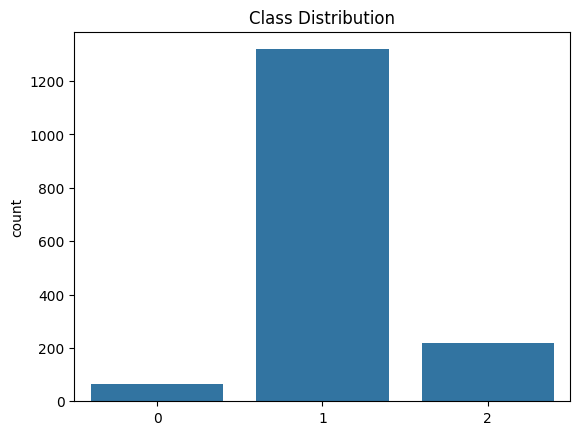

In [7]:
# Load Wine Quality Dataset from UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
df.head()

# Categorize wine quality into Low, Medium, and High
def categorize_quality(quality):
    if quality <= 4:
        return 0  # Low quality
    elif quality <= 6:
        return 1  # Medium quality
    else:
        return 2  # High quality

# Apply the categorization function
df['quality'] = df['quality'].apply(categorize_quality)

# Split dataset into features and labels
X = df.drop(columns=['quality'])
y = df['quality']

# Encode target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display class distribution
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()


# Step 3: Neural Network Model Definition

## Model Architecture
**Layer configuration:**
- Input layer (11 features)
- First hidden layer: Dense(64, ReLU)
- Dropout(0.3)
- Second hidden layer: Dense(32, ReLU)
- Dropout(0.3)
- Output layer: Dense(3, softmax)

## Training Configuration
- Epochs: 50
- Validation split: 0.2

## Wandb Integration
**Callbacks implementation:**
- WandbMetricsLogger for tracking metrics
- WandbModelCheckpoint for model checkpointing

## Training Monitoring
- Track loss and accuracy
- Monitor validation metrics
- Save training progress

In [10]:
# Install or upgrade wandb to ensure the latest version
!pip install --upgrade wandb

# Correct Import for Wandb Callbacks
from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint

# Define a Neural Network Model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3, activation='softmax')  # 3 classes: Low, Medium, High
])

# Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display Model Summary
model.summary()

# Train the Model with updated wandb callbacks
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="model_weights.h5")
    ],
    verbose=1
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,947 (11.51 KB)

 Trainable params: 2,947 (11.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4691 - loss: 3.8905

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5260 - loss: 3.4663 - val_accuracy: 0.7891 - val_loss: 1.9401
Epoch 2/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7544 - loss: 1.5779

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7526 - loss: 1.5890 - val_accuracy: 0.7891 - val_loss: 0.9763
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7137 - loss: 1.1005

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7142 - loss: 1.1012 - val_accuracy: 0.7891 - val_loss: 0.7478
Epoch 4/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7361 - loss: 0.9954

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7372 - loss: 0.9861 - val_accuracy: 0.7891 - val_loss: 0.6564
Epoch 5/50
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7560 - loss: 0.9101

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7570 - loss: 0.9039 - val_accuracy: 0.7891 - val_loss: 0.6413
Epoch 6/50
16/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7941 - loss: 0.8475 

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8013 - loss: 0.7733 - val_accuracy: 0.7891 - val_loss: 0.6265
Epoch 7/50
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8098 - loss: 0.5919

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8088 - loss: 0.6103 - val_accuracy: 0.7891 - val_loss: 0.6242
Epoch 8/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8103 - loss: 0.6887  

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8109 - loss: 0.6837 - val_accuracy: 0.7891 - val_loss: 0.6234
Epoch 9/50
21/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8084 - loss: 0.6320 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8069 - loss: 0.6353 - val_accuracy: 0.7891 - val_loss: 0.6205
Epoch 10/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8111 - loss: 0.5986 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8133 - loss: 0.5978 - val_accuracy: 0.7891 - val_loss: 0.6248
Epoch 11/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8325 - loss: 0.6139 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8317 - loss: 0.6134 - val_accuracy: 0.7891 - val_loss: 0.6283
Epoch 12/50
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8111 - loss: 0.6743 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8138 - loss: 0.6651 - val_accuracy: 0.7891 - val_loss: 0.6314
Epoch 13/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8143 - loss: 0.6349 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8163 - loss: 0.6314 - val_accuracy: 0.7891 - val_loss: 0.6307
Epoch 14/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.5134 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8552 - loss: 0.5224 - val_accuracy: 0.7891 - val_loss: 0.6249
Epoch 15/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8281 - loss: 0.5704 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8281 - loss: 0.5738 - val_accuracy: 0.7891 - val_loss: 0.6259
Epoch 16/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8423 - loss: 0.5848 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8409 - loss: 0.5864 - val_accuracy: 0.7891 - val_loss: 0.6243
Epoch 17/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8422 - loss: 0.5562 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8399 - loss: 0.5577 - val_accuracy: 0.7891 - val_loss: 0.6220
Epoch 18/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8328 - loss: 0.5687 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.5670 - val_accuracy: 0.7891 - val_loss: 0.6261
Epoch 19/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.5884 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8226 - loss: 0.5874 - val_accuracy: 0.7891 - val_loss: 0.6216
Epoch 20/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.5214 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8475 - loss: 0.5298 - val_accuracy: 0.7891 - val_loss: 0.6216
Epoch 21/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8419 - loss: 0.5502 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8407 - loss: 0.5533 - val_accuracy: 0.7891 - val_loss: 0.6156
Epoch 22/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8265 - loss: 0.5863 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8271 - loss: 0.5841 - val_accuracy: 0.7891 - val_loss: 0.6166
Epoch 23/50
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8445 - loss: 0.5124 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8434 - loss: 0.5176 - val_accuracy: 0.7891 - val_loss: 0.6175
Epoch 24/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 0.5280 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8405 - loss: 0.5316 - val_accuracy: 0.7891 - val_loss: 0.6224
Epoch 25/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8294 - loss: 0.5457 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8295 - loss: 0.5461 - val_accuracy: 0.7891 - val_loss: 0.6185
Epoch 26/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8342 - loss: 0.5576 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8337 - loss: 0.5582 - val_accuracy: 0.7891 - val_loss: 0.6199
Epoch 27/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8058 - loss: 0.5933 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8089 - loss: 0.5881 - val_accuracy: 0.7891 - val_loss: 0.6160
Epoch 28/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8415 - loss: 0.5183 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8404 - loss: 0.5233 - val_accuracy: 0.7891 - val_loss: 0.6129
Epoch 29/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8583 - loss: 0.5263 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8554 - loss: 0.5282 - val_accuracy: 0.7891 - val_loss: 0.6141
Epoch 30/50
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8220 - loss: 0.5807 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8237 - loss: 0.5743 - val_accuracy: 0.7891 - val_loss: 0.6163
Epoch 31/50
18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8183 - loss: 0.5353  

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8259 - loss: 0.5379 - val_accuracy: 0.7891 - val_loss: 0.6138
Epoch 32/50
20/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8133 - loss: 0.5701  

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8205 - loss: 0.5614 - val_accuracy: 0.7891 - val_loss: 0.6119
Epoch 33/50
18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8127 - loss: 0.5341  

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8188 - loss: 0.5405 - val_accuracy: 0.7891 - val_loss: 0.6127
Epoch 34/50
18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8230 - loss: 0.5400  

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8291 - loss: 0.5369 - val_accuracy: 0.7891 - val_loss: 0.6121
Epoch 35/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8575 - loss: 0.4928 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8538 - loss: 0.4993 - val_accuracy: 0.7891 - val_loss: 0.6116
Epoch 36/50
20/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8475 - loss: 0.5063 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8423 - loss: 0.5167 - val_accuracy: 0.7891 - val_loss: 0.6129
Epoch 37/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.5187 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8465 - loss: 0.5208 - val_accuracy: 0.7891 - val_loss: 0.6115
Epoch 38/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8314 - loss: 0.5496 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8315 - loss: 0.5460 - val_accuracy: 0.7891 - val_loss: 0.6097
Epoch 39/50
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8279 - loss: 0.5538 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8294 - loss: 0.5506 - val_accuracy: 0.7891 - val_loss: 0.6080
Epoch 40/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8338 - loss: 0.5372 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8337 - loss: 0.5361 - val_accuracy: 0.7891 - val_loss: 0.6078
Epoch 41/50
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8349 - loss: 0.5087 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8348 - loss: 0.5102 - val_accuracy: 0.7891 - val_loss: 0.6094
Epoch 42/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.5574 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8184 - loss: 0.5529 - val_accuracy: 0.7891 - val_loss: 0.6102
Epoch 43/50
21/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8239 - loss: 0.5611 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8267 - loss: 0.5583 - val_accuracy: 0.7891 - val_loss: 0.6087
Epoch 44/50
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8375 - loss: 0.5365 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8370 - loss: 0.5372 - val_accuracy: 0.7891 - val_loss: 0.6135
Epoch 45/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8468 - loss: 0.5183 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8448 - loss: 0.5213 - val_accuracy: 0.7891 - val_loss: 0.6084
Epoch 46/50
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 0.5086 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8450 - loss: 0.5136 - val_accuracy: 0.7891 - val_loss: 0.6094
Epoch 47/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8113 - loss: 0.5607 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8143 - loss: 0.5566 - val_accuracy: 0.7891 - val_loss: 0.6076
Epoch 48/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8377 - loss: 0.5450 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8370 - loss: 0.5441 - val_accuracy: 0.7891 - val_loss: 0.6082
Epoch 49/50
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8363 - loss: 0.5176 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8358 - loss: 0.5188 - val_accuracy: 0.7891 - val_loss: 0.6080
Epoch 50/50
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8349 - loss: 0.4911 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8347 - loss: 0.4948 - val_accuracy: 0.7891 - val_loss: 0.6103


# Step 5: Model Architecture Visualization

## Visualization Setup
- Import TensorFlow visualization utilities
- Configure display settings

## Architecture Diagram
- Generate complete model architecture
- Display layer connections
- Show input/output shapes

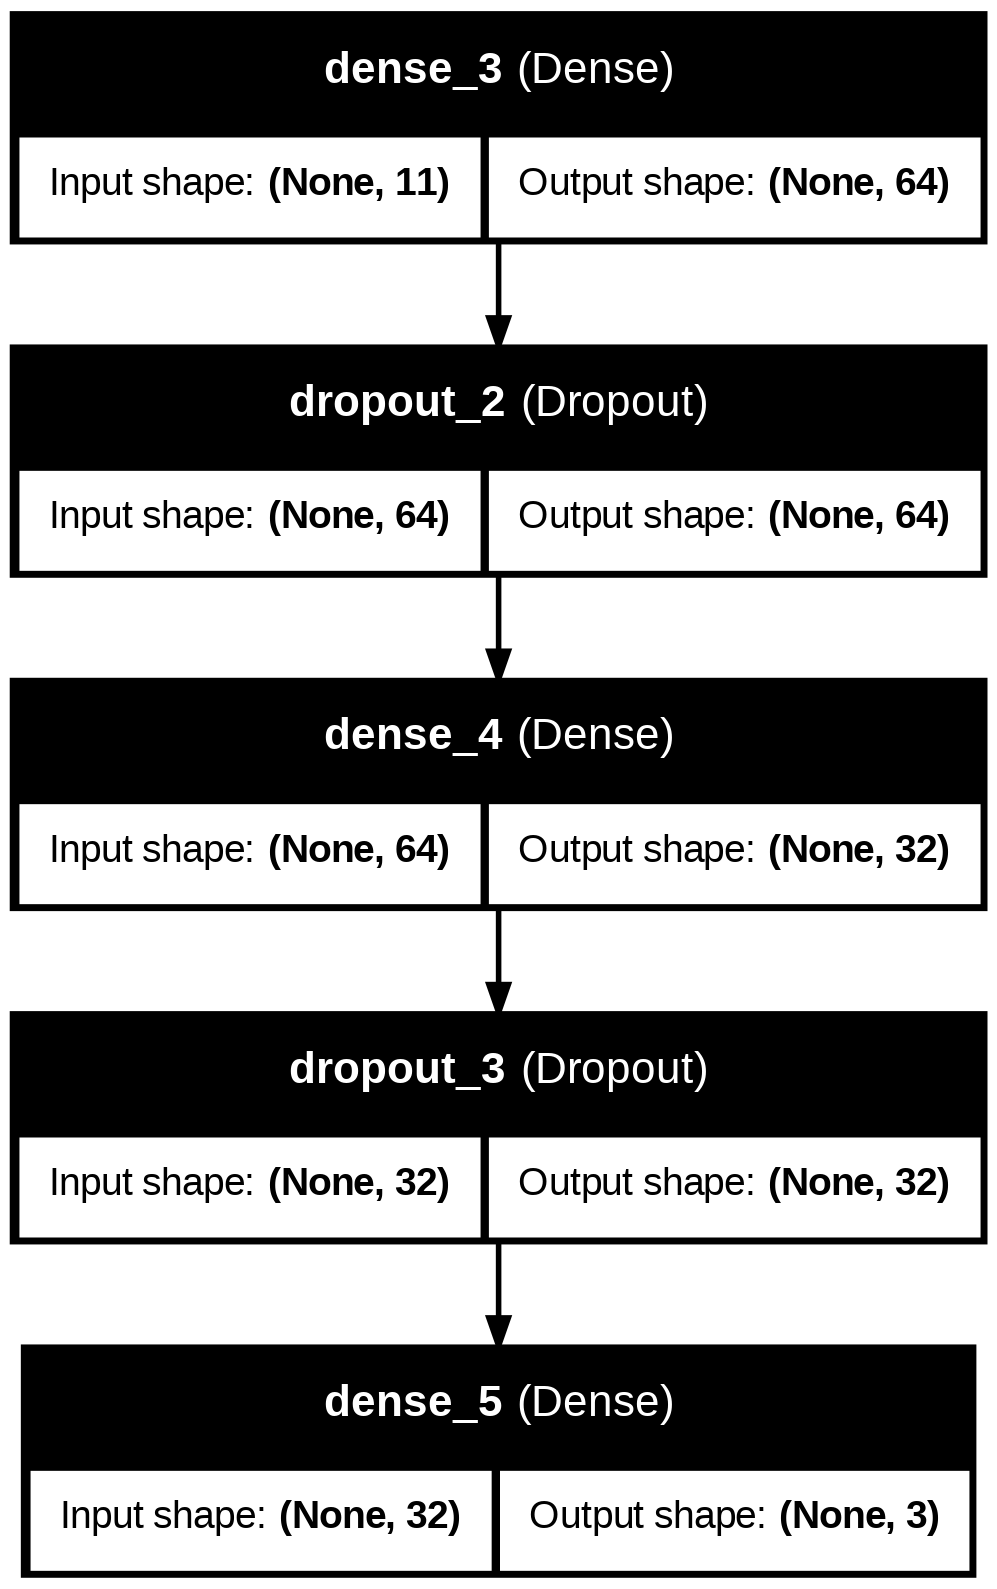

In [15]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# Save and Display Model Architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the saved image
display(Image(filename='model_architecture.png'))


# Step 6: Model Evaluation and Performance Analysis

## Performance Metrics
**Model evaluation:**
- Test accuracy and loss
- Per-class precision, recall, and F1-score
- Confusion matrix

## Visualization
**Performance curves:**
- ROC curves with AUC scores
- Precision-Recall curves
- Class-wise performance analysis

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7994 - loss: 0.6043

Test Accuracy: 0.8250
Test Loss: 0.5553
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

Classification Report:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        13
      Medium       0.82      1.00      0.90       264
        High       0.00      0.00      0.00        43

    accuracy                           0.82       320
   macro avg       0.27      0.33      0.30       320
weighted avg       0.68      0.82      0.75       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


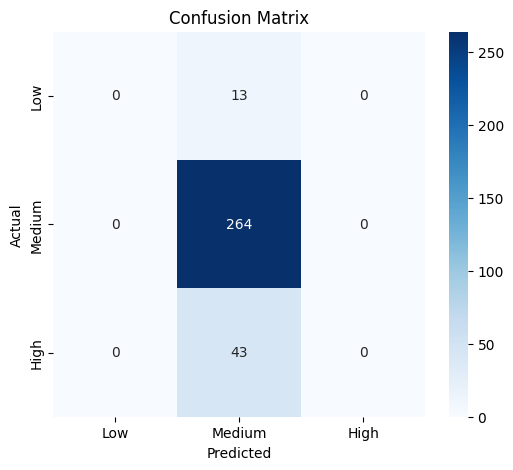

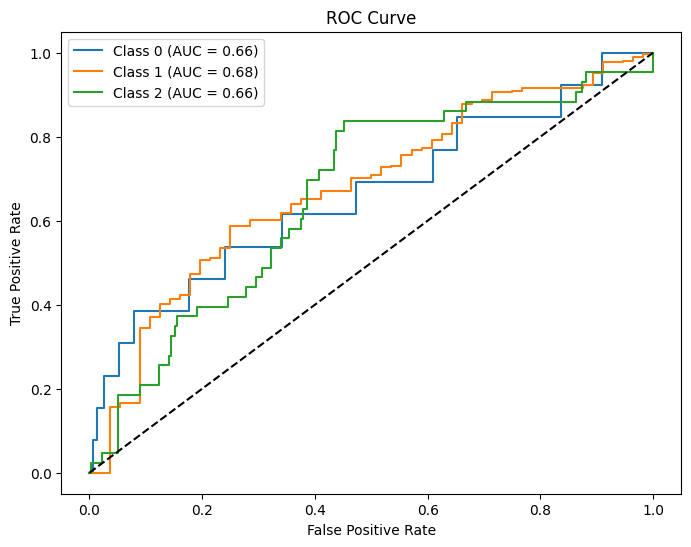

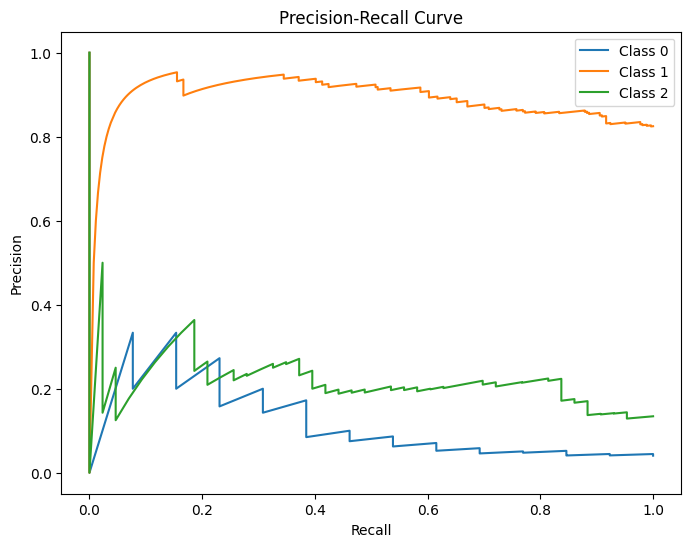

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the Model on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_pred_probs[:, i]):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i in range(3):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f"Class {i}")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


In [14]:
# Identify Misclassified Samples
misclassified_indices = np.where(y_test != y_pred)[0]

# Display Sample Misclassifications Per Class
for class_label in range(3):
    print(f"\nMisclassified Samples for Class {class_label}:")
    indices = [i for i in misclassified_indices if y_test[i] == class_label]
    display(X_test.iloc[indices[:5]])  # Show first 5 misclassified samples for each class

# Save Artifacts: ROC, PR Curves, and Confusion Matrix
plt.figure()
plt.savefig("roc_curve.png")
plt.figure()
plt.savefig("pr_curve.png")
plt.figure()
plt.savefig("confusion_matrix.png")

# Save Trained Model
model.save("wine_quality_model.h5")

# Log Artifacts to Weights & Biases
import wandb
wandb.init(project="deep-learning-classification")
wandb.save("wine_quality_model.h5")
wandb.save("roc_curve.png")
wandb.save("pr_curve.png")
wandb.save("confusion_matrix.png")
wandb.finish()

print("Artifacts successfully saved and logged to Weights & Biases.")




Misclassified Samples for Class 0:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
170,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1
266,8.1,0.870,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,9.8
573,10.5,0.590,0.49,2.1,0.070,14.0,47.0,0.99910,3.30,0.56,9.6
600,8.2,0.915,0.27,2.1,0.088,7.0,23.0,0.99620,3.26,0.47,10.0
1176,6.5,0.880,0.03,5.6,0.079,23.0,47.0,0.99572,3.58,0.50,11.2



Misclassified Samples for Class 1:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol



Misclassified Samples for Class 2:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6
1058,9.9,0.53,0.57,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6
1107,9.1,0.30,0.41,2.0,0.068,10.0,24.0,0.99523,3.27,0.85,11.7
950,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9
243,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2


Artifacts successfully saved and logged to Weights & Biases.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>